In [2]:
import pandas as pd

url = "https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1"
data = pd.read_csv(url)

data.head()
#data.isnull().sum()
#data.info()


,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first')

encoded_columns = encoder.fit_transform(data[['sex', 'region']]).toarray()

encoded_column_names = encoder.get_feature_names_out(['sex', 'region']) #Chatgpt recommended for getting the correct variable names

encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

df_clean = pd.concat([data.drop(['sex', 'region'], axis=1).reset_index(drop=True), encoded_df], axis=1)

df_clean.head()



,age,bmi,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,yes,16884.92400,0.0,0.0,0.0,1.0
1,33,22.705,no,21984.47061,1.0,1.0,0.0,0.0
2,32,28.880,no,3866.85520,1.0,1.0,0.0,0.0
3,31,25.740,no,3756.62160,0.0,0.0,1.0,0.0
4,60,25.840,no,28923.13692,0.0,1.0,0.0,0.0


In [4]:
df_clean['smoker'] = df_clean['smoker'].map({'yes': 1, 'no': 0})
df_clean.head()

,age,bmi,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,1,16884.92400,0.0,0.0,0.0,1.0
1,33,22.705,0,21984.47061,1.0,1.0,0.0,0.0
2,32,28.880,0,3866.85520,1.0,1.0,0.0,0.0
3,31,25.740,0,3756.62160,0.0,0.0,1.0,0.0
4,60,25.840,0,28923.13692,0.0,1.0,0.0,0.0


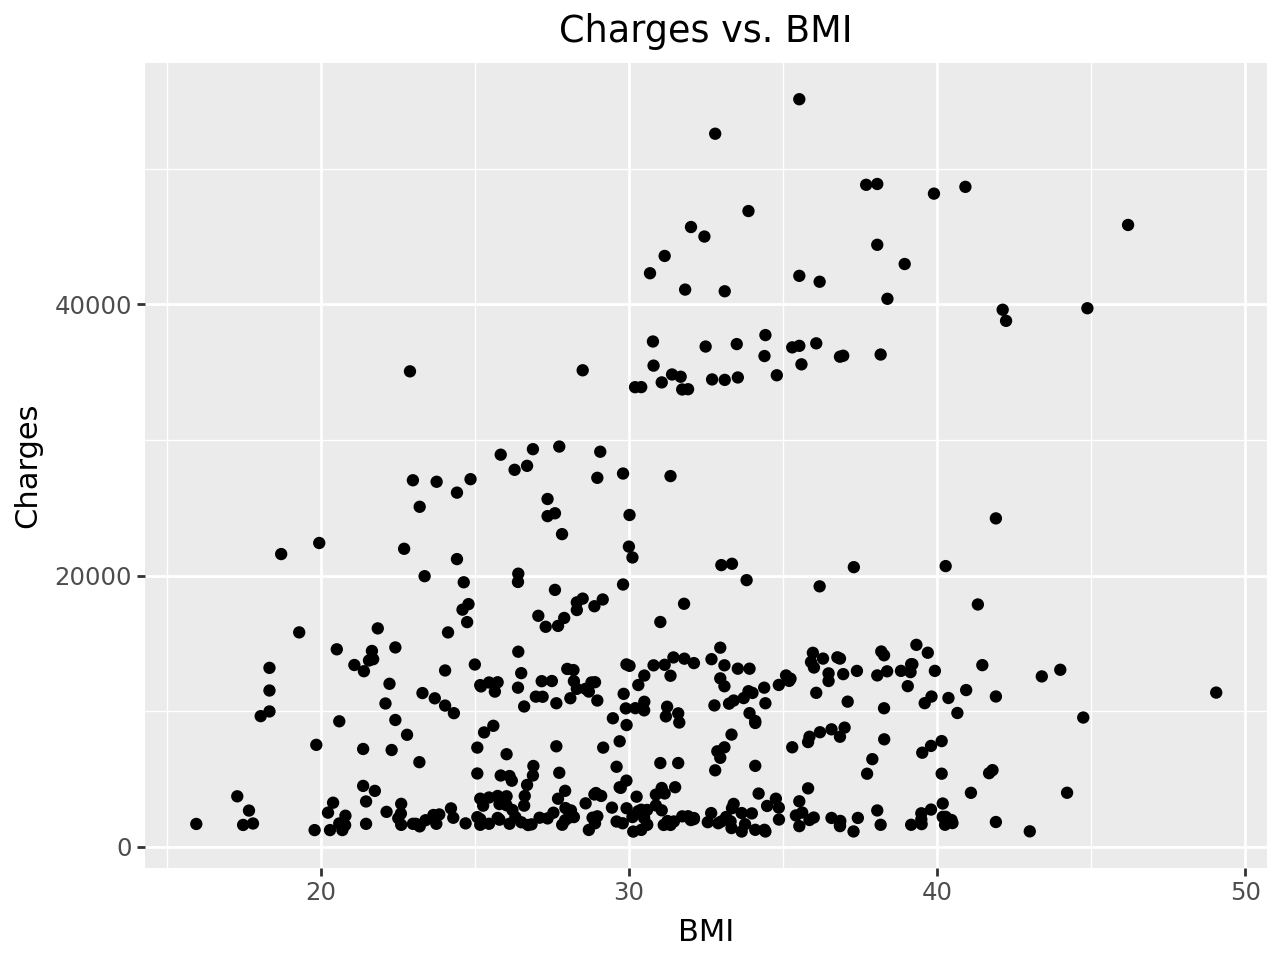

In [5]:
from plotnine import *

(ggplot(df_clean, aes(x='bmi', y='charges'))
    + geom_point()
    + labs(x='BMI', y='Charges')
    + ggtitle('Charges vs. BMI')
)

There is not a strong relationship between these two variables. The highest charges appear when the BMI is larger than 30, but there are also very low charges where the BMI is larger than 30.

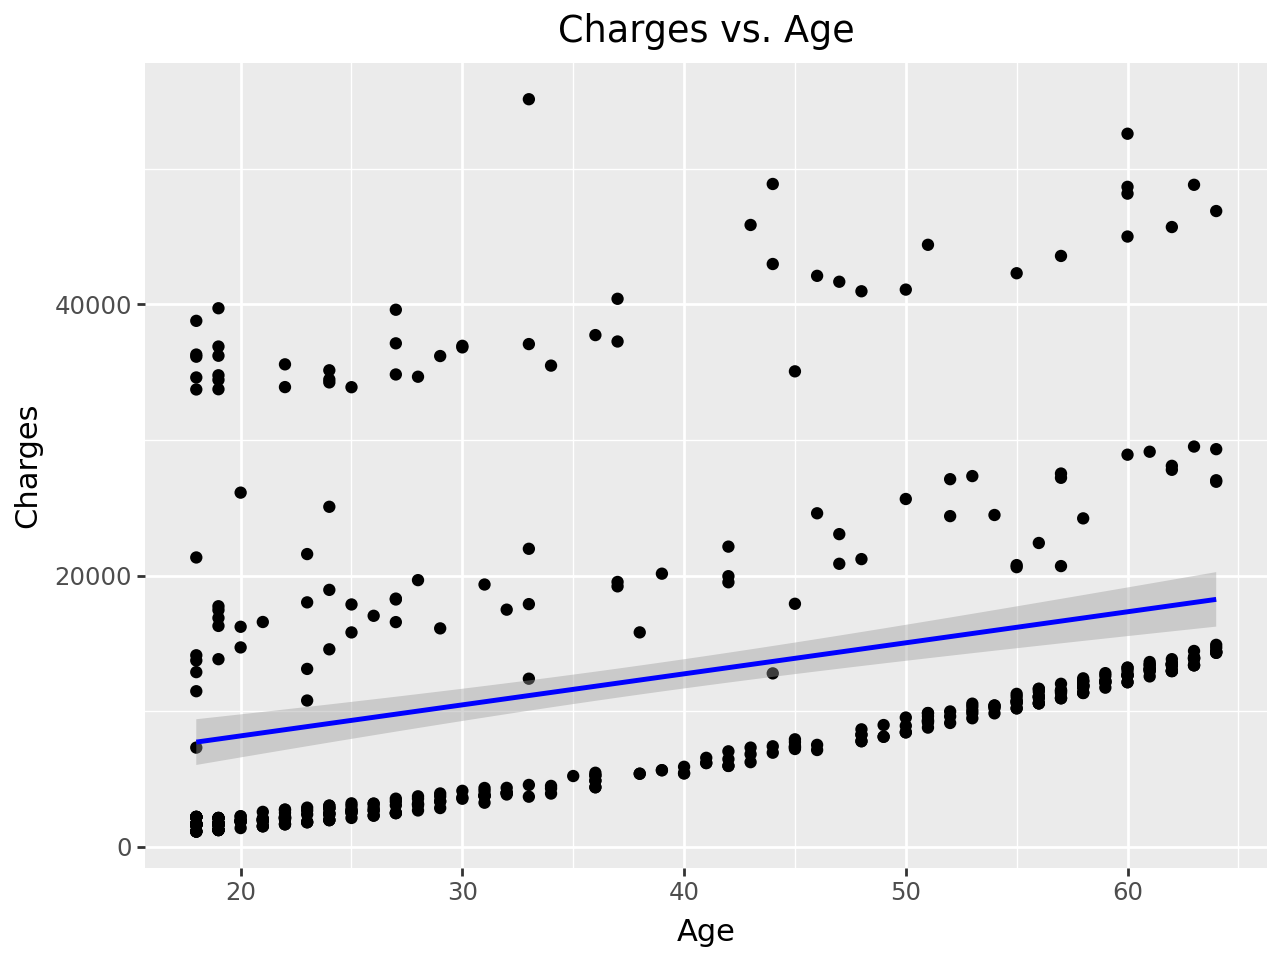

In [6]:
(ggplot(df_clean, aes(x='age', y='charges'))
    + geom_point()
    + geom_smooth(method = "lm", se = True, color = 'blue') #ChatGPT recommended to add a confidence interval
    + labs(x='Age', y='Charges')
    + ggtitle('Charges vs. Age')
)

There is not a strong relationship between these two variables. There seems to be a slight trend where charges increase as age does, but this trend is offset by large variability within each age group. The blue line shows that the majority of the datapoints follow this trend, but as we can see there might be other factors that in the dataset that cause this trend to differ with other individuals.

Part Two: Simple Linear Models

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Model 1
Y_model1 = df_clean['charges']
X_model1 = df_clean['age'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_model1, Y_model1, test_size=0.25)

model1 = LinearRegression()
model1.fit(X_train, y_train)

y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

mse_train_model1 = mean_squared_error(y_train, y_train_pred)
mse_test_model1 = mean_squared_error(y_test, y_test_pred)

print("Model 1 MSE (Train):", mse_train_model1)
print("Model 1 MSE (Test):", mse_test_model1)
print("Model 1 R^2 (Train):", model1.score(X_train, y_train))
print("Model 1 R^2 (Test):", model1.score(X_test, y_test))
print("Model 1 Coefficients:", model1.coef_[0])
print("Model 1 Intercept:", model1.intercept_)



Model 1 MSE (Train): 134072444.814761
Model 1 MSE (Test): 105564748.60357279
Model 1 R^2 (Train): 0.08280666345514298
Model 1 R^2 (Test): 0.13701460998533355
Model 1 Coefficients: 214.6529244375471
Model 1 Intercept: 4517.8818390043925


This model is not a very good fit as we see the R squared is low and the MSE is relatively high. As a person gets one year older, this model predicts the charge to increase by 214 dollars.

In [10]:
#Model 2

Y_model2 = df_clean['charges']
X_model2 = df_clean[['age','sex_male']]

X_train, X_test, y_train, y_test = train_test_split(X_model2, Y_model2, test_size=0.25)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

mse_train_model2 = mean_squared_error(y_train, y_train_pred)
mse_test_model2 = mean_squared_error(y_test, y_test_pred)

print("Model 2 MSE (Train):", mse_train_model2)
print("Model 2 MSE (Test):", mse_test_model2)
print("Model 2 R^2 (Train):", model2.score(X_train, y_train))
print("Model 2 R^2 (Test):", model2.score(X_test, y_test))
print("Model 2 Coefficient Age:", model2.coef_[0])
print("Model 2 Coefficient Sex:", model2.coef_[1])
print("Model 2 Intercept:", model2.intercept_)



Model 2 MSE (Train): 126961657.05235125
Model 2 MSE (Test): 126041808.55498078
Model 2 R^2 (Train): 0.09191941568709383
Model 2 R^2 (Test): 0.11866369081893624
Model 2 Coefficient Age: 218.59418217485708
Model 2 Coefficient Sex: 920.0428507756163
Model 2 Intercept: 3791.76765308828


In [13]:
#Model 3

Y_model3 = df_clean['charges']
X_model3 = df_clean[['age', 'smoker']]

X_train, X_test, y_train, y_test = train_test_split(X_model3, Y_model3, test_size=0.25)

model3 = LinearRegression()
model3.fit(X_train, y_train)

y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

mse_train_model3 = mean_squared_error(y_train, y_train_pred)
mse_test_model3 = mean_squared_error(y_test, y_test_pred)

print("Model 3 MSE (Train):", mse_train_model3)
print("Model 3 MSE (Test):", mse_test_model3)
print("Model 3 R^2 (Train):", model3.score(X_train, y_train))
print("Model 3 R^2 (Test):", model3.score(X_test, y_test))
print("Model 3 Coefficient Age:", model3.coef_[0])
print("Model 3 Coefficient Smoker:", model3.coef_[1])
print("Model 3 Intercept:", model3.intercept_)

Model 3 MSE (Train): 37242597.72179932
Model 3 MSE (Test): 23440867.68588416
Model 3 R^2 (Train): 0.738151778678178
Model 3 R^2 (Test): 0.826952856388497
Model 3 Coefficient Age: 249.86122362242884
Model 3 Coefficient Smoker: 23435.970002681297
Model 3 Intercept: -1873.5734829028806


Model Q3 has a much higher r squared and its MSE is also lower than the model in Q2. Model Q3 is a better predictor.

Part Three: Multiple Linear Models

In [15]:
#Model 4

Y_model4 = df_clean['charges']
X_model4 = df_clean[['age', 'bmi']]

X_train, X_test, y_train, y_test = train_test_split(X_model4, Y_model4, test_size=0.25)

model4 = LinearRegression()
model4.fit(X_train, y_train)

y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

mse_train_model4 = mean_squared_error(y_train, y_train_pred)
mse_test_model4 = mean_squared_error(y_test, y_test_pred)

print("Model 4 MSE (Train):", mse_train_model4)
print("Model 4 MSE (Test):", mse_test_model4)
print("Model 4 R^2 (Train):", model4.score(X_train, y_train))
print("Model 4 R^2 (Test):", model4.score(X_test, y_test))
print("Model 4 Coefficient Age:", model4.coef_[0])
print("Model 4 Coefficient BMI:", model4.coef_[1])
print("Model 4 Intercept:", model4.intercept_)


Model 4 MSE (Train): 132884336.50075333
Model 4 MSE (Test): 97533106.68766393
Model 4 R^2 (Train): 0.11991549762710507
Model 4 R^2 (Test): 0.09685839775001548
Model 4 Coefficient Age: 206.32377727159027
Model 4 Coefficient BMI: 341.5322967935874
Model 4 Intercept: -5737.114136487817


This model may be overfitting a bit and the other one in Q1 part two may be underfitting. They both have similar R squared so they are close in terms of predictiion accuracy.

In [17]:

df_clean['age^2'] = df_clean['age']**2
#Model 5 Age^2 and Age

Y_model5 = df_clean['charges']
X_model5 = df_clean[['age', 'age^2']]

X_train, X_test, y_train, y_test = train_test_split(X_model5, Y_model5, test_size=0.25)

model5 = LinearRegression()
model5.fit(X_train, y_train)

y_train_pred = model5.predict(X_train)
y_test_pred = model5.predict(X_test)

mse_train_model5 = mean_squared_error(y_train, y_train_pred)
mse_test_model5 = mean_squared_error(y_test, y_test_pred)

print("Model 5 MSE (Train):", mse_train_model5)
print("Model 5 MSE (Test):", mse_test_model5)
print("Model 5 R^2 (Train):", model5.score(X_train, y_train))
print("Model 5 R^2 (Test):", model5.score(X_test, y_test))
print("Model 5 Coefficient Age:", model5.coef_[0])
print("Model 5 Coefficient Age^2:", model5.coef_[1])
print("Model 5 Intercept:", model5.intercept_)


Model 5 MSE (Train): 119990619.39522487
Model 5 MSE (Test): 147319736.02316543
Model 5 R^2 (Train): 0.09180122777987143
Model 5 R^2 (Test): 0.10620407529228859
Model 5 Coefficient Age: 252.72810710104062
Model 5 Coefficient Age^2: -0.5143050286081633
Model 5 Intercept: 3370.4224195262905


This one is also very similar to the model in question two part one. Although this model seems to be overfitting.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Model 6
Y_model6 = df_clean['charges']

poly = PolynomialFeatures(degree=4, include_bias=False)
X_model6 = poly.fit_transform(df_clean[['age']])

X_train, X_test, y_train, y_test = train_test_split(X_model6, Y_model6, test_size=0.25)

model_poly4 = LinearRegression()
model_poly4.fit(X_train, y_train)

y_train_pred = model_poly4.predict(X_train)
y_test_pred = model_poly4.predict(X_test)

mse_train_poly4 = mean_squared_error(y_train, y_train_pred)
mse_test_poly4 = mean_squared_error(y_test, y_test_pred)
r2_train_poly4 = model_poly4.score(X_train, y_train)
r2_test_poly4 = model_poly4.score(X_test, y_test)

print("MSE (Train):", mse_train_poly4)
print("MSE (Test):", mse_test_poly4)
print("R^2 (Train):", r2_train_poly4)
print("R^2 (Test):", r2_test_poly4)
print("Coefficients:", model_poly4.coef_)
print("Intercept:", model_poly4.intercept_)


MSE (Train): 132657631.60117494
MSE (Test): 104679305.22933581
R^2 (Train): 0.10068927472608613
R^2 (Test): 0.1289904845747064
Coefficients: [-8.95321991e+03  3.97803349e+02 -7.16470627e+00  4.56428864e-02]
Intercept: 77705.56552152341


This one is also very similar to the model in question two part one. This model seems to be overfitting as well.

In [66]:
# Model 7
Y_model7 = df_clean['charges']

poly_12 = PolynomialFeatures(degree=12, include_bias=False)
X_model7 = poly_12.fit_transform(df_clean[['age']])

X_train, X_test, y_train, y_test = train_test_split(X_model7, Y_model7, test_size=0.25)

model_poly12 = LinearRegression()
model_poly12.fit(X_train, y_train)

y_train_pred = model_poly12.predict(X_train)
y_test_pred = model_poly12.predict(X_test)

mse_train_poly12 = mean_squared_error(y_train, y_train_pred)
mse_test_poly12 = mean_squared_error(y_test, y_test_pred)
r2_train_poly12 = model_poly12.score(X_train, y_train)
r2_test_poly12 = model_poly12.score(X_test, y_test)

print("MSE (Train):", mse_train_poly12)
print("MSE (Test):", mse_test_poly12)
print("R^2 (Train):", r2_train_poly12)
print("R^2 (Test):", r2_test_poly12)
print("Coefficients:", model_poly12.coef_)
print("Intercept:", model_poly12.intercept_)

MSE (Train): 135056540.6405362
MSE (Test): 100296767.46908174
R^2 (Train): 0.09154682337580367
R^2 (Test): 0.11222941995966951
Coefficients: [ 6.28050388e-12  1.65609337e-07  4.43634819e-09  7.33557899e-08
  8.85717463e-07  6.13561390e-06  2.84842845e-06 -2.18898417e-07
  6.25266848e-09 -8.59424592e-11  5.63419216e-13 -1.36551947e-15]
Intercept: 7452.095415411488


This one is also very similar to the model in question two part one.

Model 7 seems to be the best model so far, but its R squared is still very low even though the MSE is the lowest. Also, the model might be overfitting.

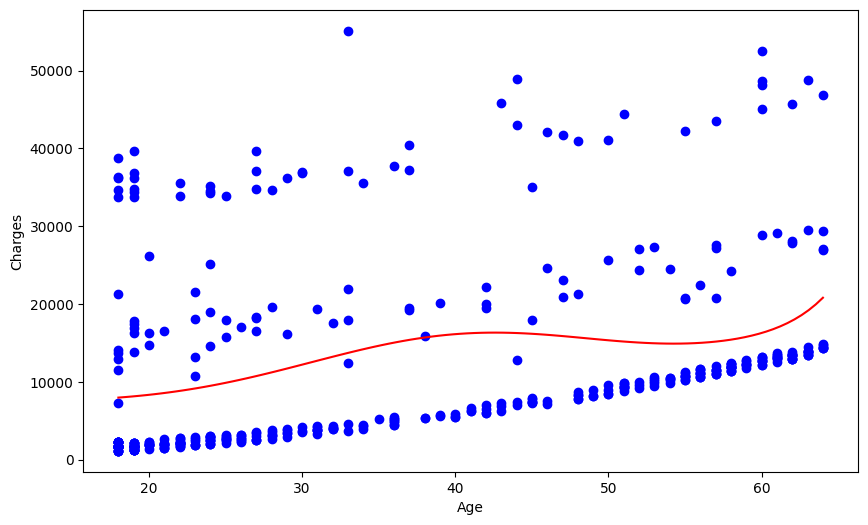

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['age'], df_clean['charges'], color='blue')

# ChatGPT assisted with creating the smooth line
age_range = np.linspace(df_clean['age'].min(), df_clean['age'].max(), 100).reshape(-1, 1)
age_range_poly = poly_12.fit_transform(age_range)

charges_pred_poly12 = model_poly12.predict(age_range_poly)

plt.plot(age_range, charges_pred_poly12, color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


Part Four: New data

In [44]:
#Clean and set up data
url2 = "https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1"
data2 = pd.read_csv(url2)

encoder = OneHotEncoder(drop = 'first')

encoded_columns2 = encoder.fit_transform(data2[['sex', 'region']]).toarray()

encoded_column_names2 = encoder.get_feature_names_out(['sex', 'region'])

encoded_df2 = pd.DataFrame(encoded_columns2, columns=encoded_column_names2)

data2 = pd.concat([data2.drop(['sex', 'region'], axis=1).reset_index(drop=True), encoded_df2], axis=1)

data2['smoker'] = data2['smoker'].map({'yes': 1, 'no': 0})
#data2['smoker'].unique()

data2.head()


,age,bmi,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,23,34.400,0,1826.84300,1.0,0.0,0.0,1.0
1,56,40.300,0,10602.38500,1.0,0.0,0.0,1.0
2,18,34.100,0,1137.01100,1.0,0.0,1.0,0.0
3,63,23.085,0,14451.83515,0.0,0.0,0.0,0.0
4,63,28.310,0,13770.09790,1.0,1.0,0.0,0.0


In [21]:
#Model 8 only age

X_model8 = df_clean[['age']]
Y_model8 = df_clean['charges']
X_test_model8 = data2[['age']]
Y_test_model8 = data2['charges']

model8 = LinearRegression()
model8.fit(X_model8, Y_model8)

y_test_pred8 = model1.predict(X_test_model8)
mse_test_model8 = mean_squared_error(Y_test_model8, y_test_pred8)
print("Model 8 MSE:", mse_test_model8)


Model 8 MSE: 136649900.9234484


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names


In [38]:
#Model 9 age and bmi

X_model9 = df_clean[['age', 'bmi']]
Y_model9 = df_clean['charges']
X_test_model9 = data2[['age', 'bmi']]
Y_test_model9 = data2['charges']

model9 = LinearRegression()
model9.fit(X_model9, Y_model9)

y_test_pred9 = model9.predict(X_test_model9)
mse_test_model9 = mean_squared_error(Y_test_model9, y_test_pred9)
print("Model 9 MSE:", mse_test_model9)

Model 9 MSE: 132636406.1108129


In [45]:
#Model 10 age, bmi, smoker

X_model10 = df_clean[['age', 'bmi', 'smoker']]
Y_model10 = df_clean['charges']
X_test_model10 = data2[['age', 'bmi', 'smoker']]
Y_test_model10 = data2['charges']

model10 = LinearRegression()
model10.fit(X_model10, Y_model10)

y_test_pred10 = model10.predict(X_test_model10)
mse_test_model10 = mean_squared_error(Y_test_model10, y_test_pred10)
print("Model 10 MSE:", mse_test_model10)

Model 10 MSE: 35377541.24141632


In [47]:
#Model 11 age, bmi both interacted with smoker

df_clean['age_smoker'] = df_clean['age'] * df_clean['smoker']
df_clean['bmi_smoker'] = df_clean['bmi'] * df_clean['smoker']

X_model11 = df_clean[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
Y_model11 = df_clean['charges']

data2['age_smoker'] = data2['age'] * data2['smoker']
data2['bmi_smoker'] = data2['bmi'] * data2['smoker']

X_test_model11 = data2[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
Y_test_model11 = data2['charges']

model11 = LinearRegression()
model11.fit(X_model11, Y_model11)

y_test_pred11 = model11.predict(X_test_model11)
mse_test_model11 = mean_squared_error(Y_test_model11, y_test_pred11)
print("Model 11 MSE:", mse_test_model11)



Model 11 MSE: 24795908.41264334


In [50]:
#Model 12 age, bmi both interacted with smoker, smoker
X_model12 = df_clean[['age', 'bmi', 'smoker', 'age_smoker', 'bmi_smoker']]
Y_model12 = df_clean['charges']

X_test_model12 = data2[['age', 'bmi', 'smoker', 'age_smoker', 'bmi_smoker']]
Y_test_model12 = data2['charges']

model12 = LinearRegression()
model12.fit(X_model12, Y_model12)

y_test_pred12 = model12.predict(X_test_model12)
mse_test_model12 = mean_squared_error(Y_test_model12, y_test_pred12)
print("Model 12 MSE:", mse_test_model12)

Model 12 MSE: 21786256.86685252


The last model (model 12) has the lowest MSE, so this seems to be the best predictor of the new data.

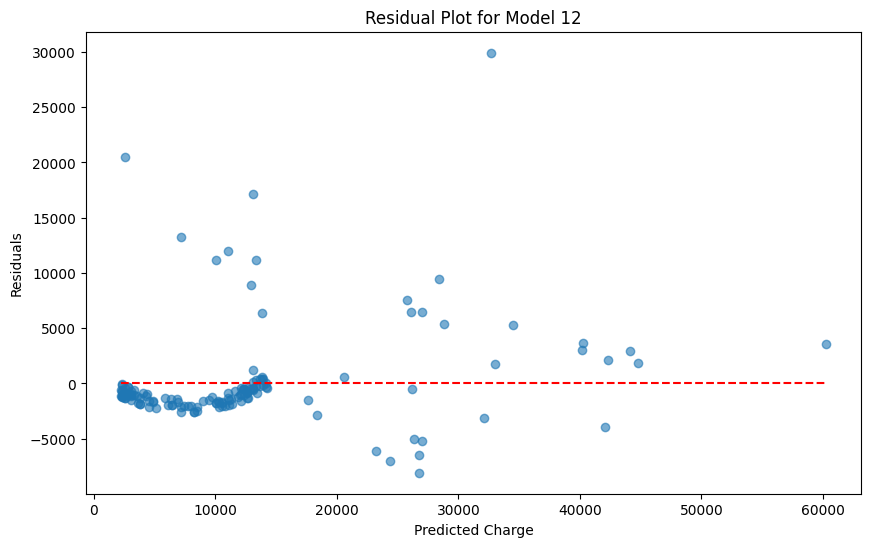

In [56]:
import matplotlib.pyplot as plt

residuals = Y_test_model12 - y_test_pred12

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred12, residuals, alpha=0.6)
plt.hlines(y=0, xmin=min(y_test_pred12), xmax=max(y_test_pred12), color='red', linestyle='--') #ChatGPT recommended hlines to create the line at zero
plt.xlabel("Predicted Charge")
plt.ylabel("Residuals")
plt.title("Residual Plot for Model 12")
plt.show()


Part 5: Full Exploration

In [72]:
X = df_clean[['age', 'bmi', 'age_smoker', 'smoker']]
Y = df_clean['charges']

X_test = data2[['age', 'bmi', 'age_smoker', 'smoker']]
Y_test = data2['charges']

# ChatGPT recommended for loop to test different polynomial degrees
mse_values = {}
best_mse = float("inf")
best_degree = None
best_model = None
best_predictions = None

for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly, Y)

    y_test_pred = model.predict(X_test_poly)
    mse_test = mean_squared_error(Y_test, y_test_pred)
    mse_values[degree] = mse_test

    if mse_test < best_mse:
        best_mse = mse_test
        best_degree = degree
        best_model = model
        best_predictions = y_test_pred

print(f"Best Model: Polynomial Degree {best_degree} with MSE {best_mse}")

Best Model: Polynomial Degree 2 with MSE 21333664.97551137


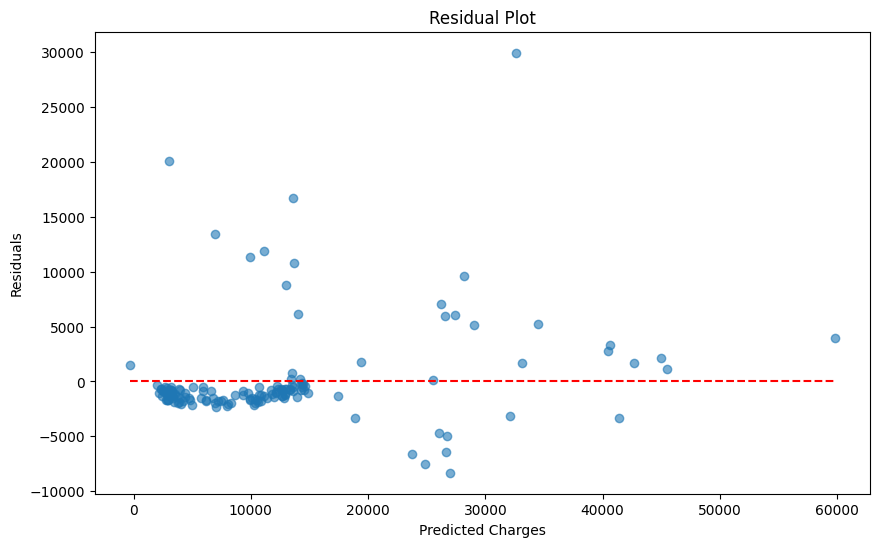

In [74]:

residuals = Y_test - best_predictions

plt.figure(figsize=(10, 6))
plt.scatter(best_predictions, residuals, alpha=0.6)
plt.hlines(y=0, xmin=min(best_predictions), xmax=max(best_predictions), color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
